In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set(font_scale=1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [40]:
#reading the data
data=pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
dataset= data.drop(columns = ['RowNumber','CustomerId','Surname'])
dataset.info()
dataset['Gender'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


array(['Female', 'Male'], dtype=object)

<Axes: ylabel='Frequency'>

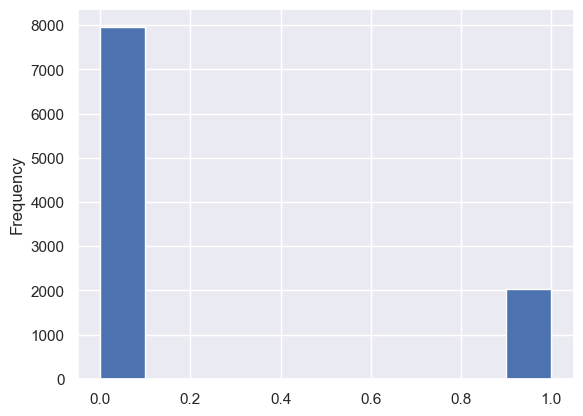

In [42]:
dataset['Gender'].unique()
dataset= pd.get_dummies(data=dataset,drop_first=True)
dataset

dataset.Exited.plot.hist()
     

Negative (0):  7963
Positive (1):  2037


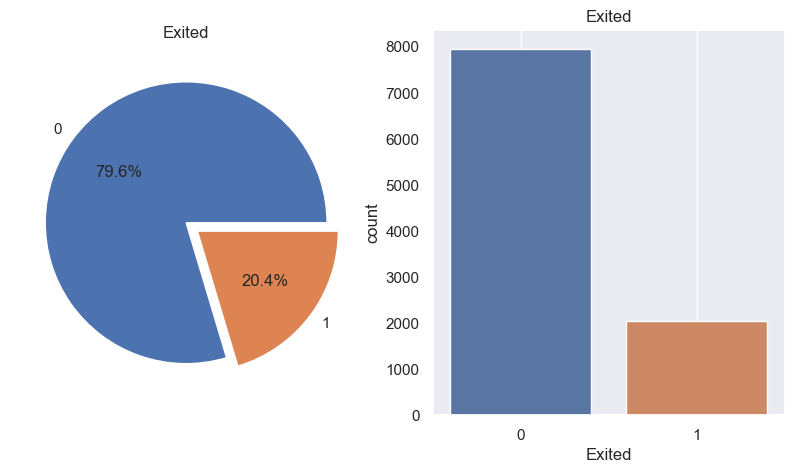

In [43]:
f, ax = plt.subplots(1,2,figsize=(10,5))

data['Exited'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Exited')
ax[0].set_ylabel('')

sns.countplot(x = data['Exited'], ax = ax[1])
ax[1].set_title('Exited')

N,P = data['Exited'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)

plt.grid()
plt.show()

In [44]:
X= dataset.drop(columns='Exited')
y= dataset['Exited']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
     

In [46]:
X_test.shape

(2000, 11)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred= clf.predict(X_test)


In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_train,y_train), log_reg.score(X_test, y_test)

(0.8085, 0.811)

In [50]:
log_reg_pred = log_reg.predict(X_test)

In [51]:
#Train score and Test score of Random Forest
print("Train accuracy: ", log_reg.score(X_train,y_train)*100)
print("Accuracy (test) score:", log_reg.score(X_test, y_test)*100)
print("Accuracy score:", accuracy_score(y_test, log_reg_pred)*100)

Train accuracy:  80.85
Accuracy (test) score: 81.10000000000001
Accuracy score: 81.10000000000001


In [52]:
print("Precision score: ", precision_score(y_test, log_reg_pred)*100)
print("Recall: ", recall_score(y_test, log_reg_pred)*100)
print("F1-score: ", f1_score(y_test, log_reg_pred)*100)

Precision score:  58.18181818181818
Recall:  23.703703703703706
F1-score:  33.68421052631579


In [53]:
print("Classification Report :\n", classification_report(y_test, log_reg_pred, digits=4))

Classification Report :
               precision    recall  f1-score   support

           0     0.8316    0.9567    0.8898      1595
           1     0.5818    0.2370    0.3368       405

    accuracy                         0.8110      2000
   macro avg     0.7067    0.5969    0.6133      2000
weighted avg     0.7810    0.8110    0.7778      2000



# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [55]:
RandomForestClassifier(criterion='entropy')

RandomForestClassifier(criterion='entropy')

In [56]:
rf_pred = rf.predict(X_test)

In [57]:
#Train score and Test score of Random Forest
print("Train accuracy: ", rf.score(X_train,y_train)*100)
print("Accuracy (test) score:", rf.score(X_test, y_test)*100)
print("Accuracy score:", accuracy_score(y_test, rf_pred)*100)

Train accuracy:  100.0
Accuracy (test) score: 86.65
Accuracy score: 86.65


In [58]:
print("Precision score: ", precision_score(y_test, rf_pred)*100)
print("Recall: ", recall_score(y_test, rf_pred)*100)
print("F1-score: ", f1_score(y_test, rf_pred)*100)

Precision score:  74.64285714285714
Recall:  51.60493827160494
F1-score:  61.02189781021898


In [59]:
print("Classification Report :\n", classification_report(y_test, rf_pred, digits=4))

Classification Report :
               precision    recall  f1-score   support

           0     0.8860    0.9555    0.9195      1595
           1     0.7464    0.5160    0.6102       405

    accuracy                         0.8665      2000
   macro avg     0.8162    0.7358    0.7648      2000
weighted avg     0.8578    0.8665    0.8568      2000

